**ALL SEARCHES**

   source destination  weight
0       A           B       5
1       B           C       8
2       B           D      12
3       C           E       6
4       D           E      10
5       E           G      15
6       A           C       4
7       A           D       7
8       B           E       9
9       C           D      11
10      D           G      13
11      A           E       3
12      B           G      14
13      C           G      16
14      A           G      20
15      A           F      18
16      B           F      21
17      C           F      22
18      D           F      25
19      E           F      30
20      G           F      27
21      A           H      35
22      B           H      38
23      C           H      40
24      D           H      45
25      E           H      42
26      F           H      33
27      G           H      37
28      H           I      28
29      I           J      31
30      J           K      26
31      K           L      29
32      L 

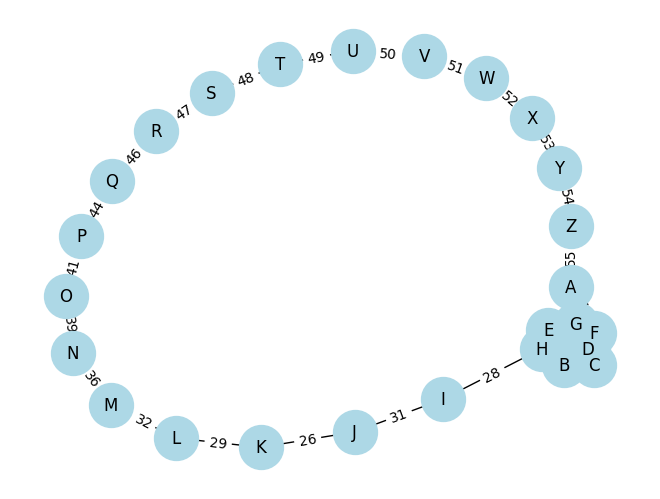

Choose a search algorithm:
1. Breadth-First Search (BFS)
2. Depth-First Search (DFS)
3. Best-First Search (BestFS)
Depth First Search Path: ['A', 'B', 'C', 'E', 'D', 'G', 'F', 'H', 'I', 'J', 'K', 'L']
Nodes traced by Depth First Search: 22528


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import math
from queue import PriorityQueue  # Import PriorityQueue

# Read the CSV file into a DataFrame
df = pd.read_csv("dummy.csv")
print(df)

# Create a new graph
G = nx.Graph()

# Add edges to the graph with weights
for index, row in df.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['weight'])

def breadth_first_search(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])
    nodes_traced = 0  # Initialize the counter

    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path, nodes_traced
        visited.add(node)
        nodes_traced += 1  # Increment the counter for each visited node

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return [], nodes_traced  # Return an empty path if no path is found

def dfs(graph, start, goal):
    visited = set()
    nodes_traced = 0  # Initialize the counter

    def dfs_recursive(node, path):
        nonlocal nodes_traced
        if node == goal:
            return path, nodes_traced
        visited.add(node)
        nodes_traced += 1  # Increment the counter for each visited node

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_path, traced = dfs_recursive(neighbor, path + [neighbor])
                nodes_traced += traced  # Increment the counter with the traced nodes from the subtree
                if new_path:
                    return new_path, nodes_traced
        return [], nodes_traced

    return dfs_recursive(start, [start])

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def heuristic(node, goal, pos):
    return euclidean_distance(node, goal, pos)

def best_first_search(graph, start, goal, pos):  # Pass 'pos' to the function
    visited = set()
    queue = PriorityQueue()
    queue.put((0, [start]))
    nodes_traced = 0  # Initialize the counter

    while not queue.empty():
        _, path = queue.get()
        node = path[-1]
        if node == goal:
            return path, nodes_traced
        visited.add(node)
        nodes_traced += 1  # Increment the counter for each visited node

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_path = path + [neighbor]
                priority = heuristic(neighbor, goal, pos)  # Calculate priority using the heuristic
                queue.put((priority, new_path))

    return [], nodes_traced  # Return an empty path if no path is found

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

start = input('Enter Start Node Position: ')
goal = input('Enter Goal Node Position: ')
print('Choose a search algorithm:')
print('1. Breadth-First Search (BFS)')
print('2. Depth-First Search (DFS)')
print('3. Best-First Search (BestFS)')  # Add BestFS option
choice = input('Enter your choice: ')

if choice == '1':
    path, nodes_traced = breadth_first_search(G, start, goal)
    if path:
        print("Breadth First Search Path:", path)
        print("Nodes traced by Breadth First Search:", nodes_traced)
    else:
        print("No path found using Breadth First Search.")
elif choice == '2':
    path, nodes_traced = dfs(G, start, goal)
    if path:
        print("Depth First Search Path:", path)
        print("Nodes traced by Depth First Search:", nodes_traced)
    else:
        print("No path found using Depth First Search.")
elif choice == '3':
    path, nodes_traced = best_first_search(G, start, goal, pos)
    if path:
        print("Best First Search Path:", path)
        print("Nodes traced by Best First Search:", nodes_traced)
    else:
        print("No path found using Best First Search.")
else:
    print('Invalid choice.')
